In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [2]:
Fraud_check= pd.read_csv("Fraud_check.csv")
Fraud_check.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
Fraud_check.shape

(600, 6)

In [4]:
Fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
Fraud_check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
Fraud_check.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [9]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

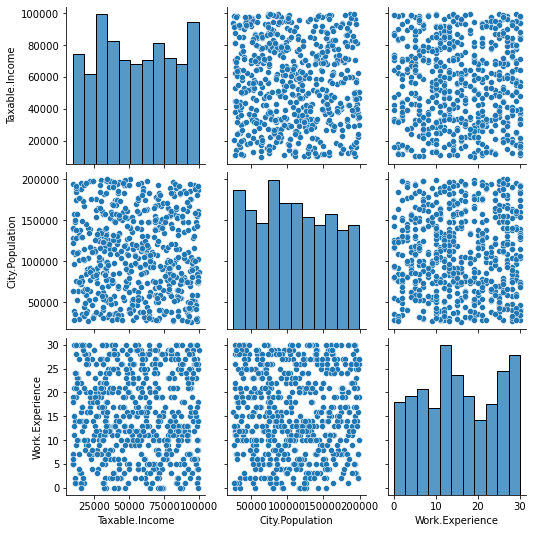

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Fraud_check)

/Users/smit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

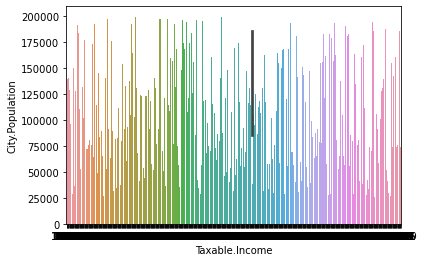

In [11]:
sns.barplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/Users/smit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

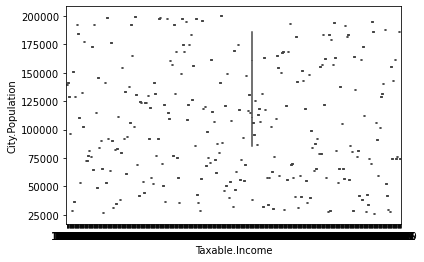

In [12]:
sns.boxplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

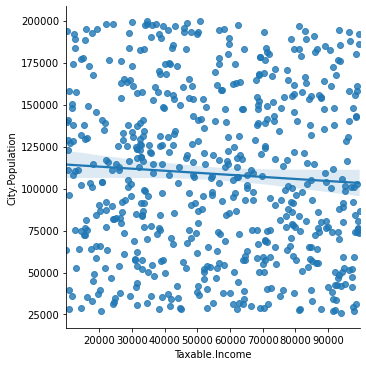

In [13]:
sns.lmplot(x='Taxable.Income',y='City.Population', data=Fraud_check)

/Users/smit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


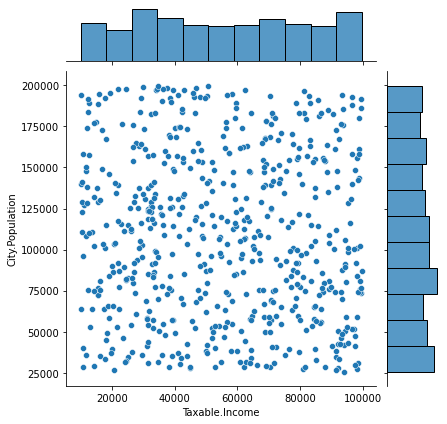

In [14]:
sns.jointplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

In [46]:
sns.stripplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

KeyError: 'Taxable.Income'

In [47]:
sns.distplot(Fraud_check['Taxable.Income'])

KeyError: 'Taxable.Income'

In [48]:
sns.distplot(Fraud_check['City.Population'])

KeyError: 'City.Population'

In [49]:
Fraud_check.loc[Fraud_check["Taxable.Income"] <= 30000,"Taxable_Income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"] > 30001,"Taxable_Income"]="Risky"

KeyError: 'Taxable.Income'

In [50]:
Fraud_check.loc[Fraud_check["Taxable.Income"]!="Good","Taxable_Income"]="Risky"

KeyError: 'Taxable.Income'

In [51]:
Fraud_check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [52]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check["Undergrad"] = label_encoder.fit_transform(Fraud_check["Undergrad"])
Fraud_check["Marital.Status"] = label_encoder.fit_transform(Fraud_check["Marital.Status"])
Fraud_check["Urban"] = label_encoder.fit_transform(Fraud_check["Urban"])
Fraud_check["Taxable_Income"] = label_encoder.fit_transform(Fraud_check["Taxable_Income"])

In [53]:
Fraud_check.drop(['City.Population'],axis=1,inplace=True)
Fraud_check.drop(['Taxable.Income'],axis=1,inplace=True)

KeyError: "['City.Population'] not found in axis"

In [54]:
Fraud_check["Taxable_Income"].unique()

array([0])

In [55]:
Fraud_check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [56]:
x = Fraud_check.iloc[:,0:4]
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [57]:
y = Fraud_check["Taxable_Income"]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income, Length: 600, dtype: int64

In [58]:
len(y)

600

In [59]:
colnames=list(Fraud_check.columns)
colnames

['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban', 'Taxable_Income']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [61]:
model=DecisionTreeClassifier(criterion="gini")
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(167.4, 108.72, 'gini = 0.0\nsamples = 480\nvalue = 480.0')]

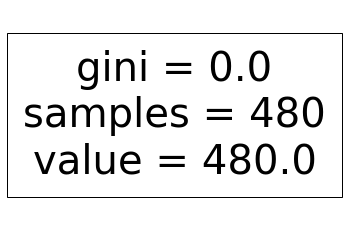

In [62]:
tree.plot_tree(model)

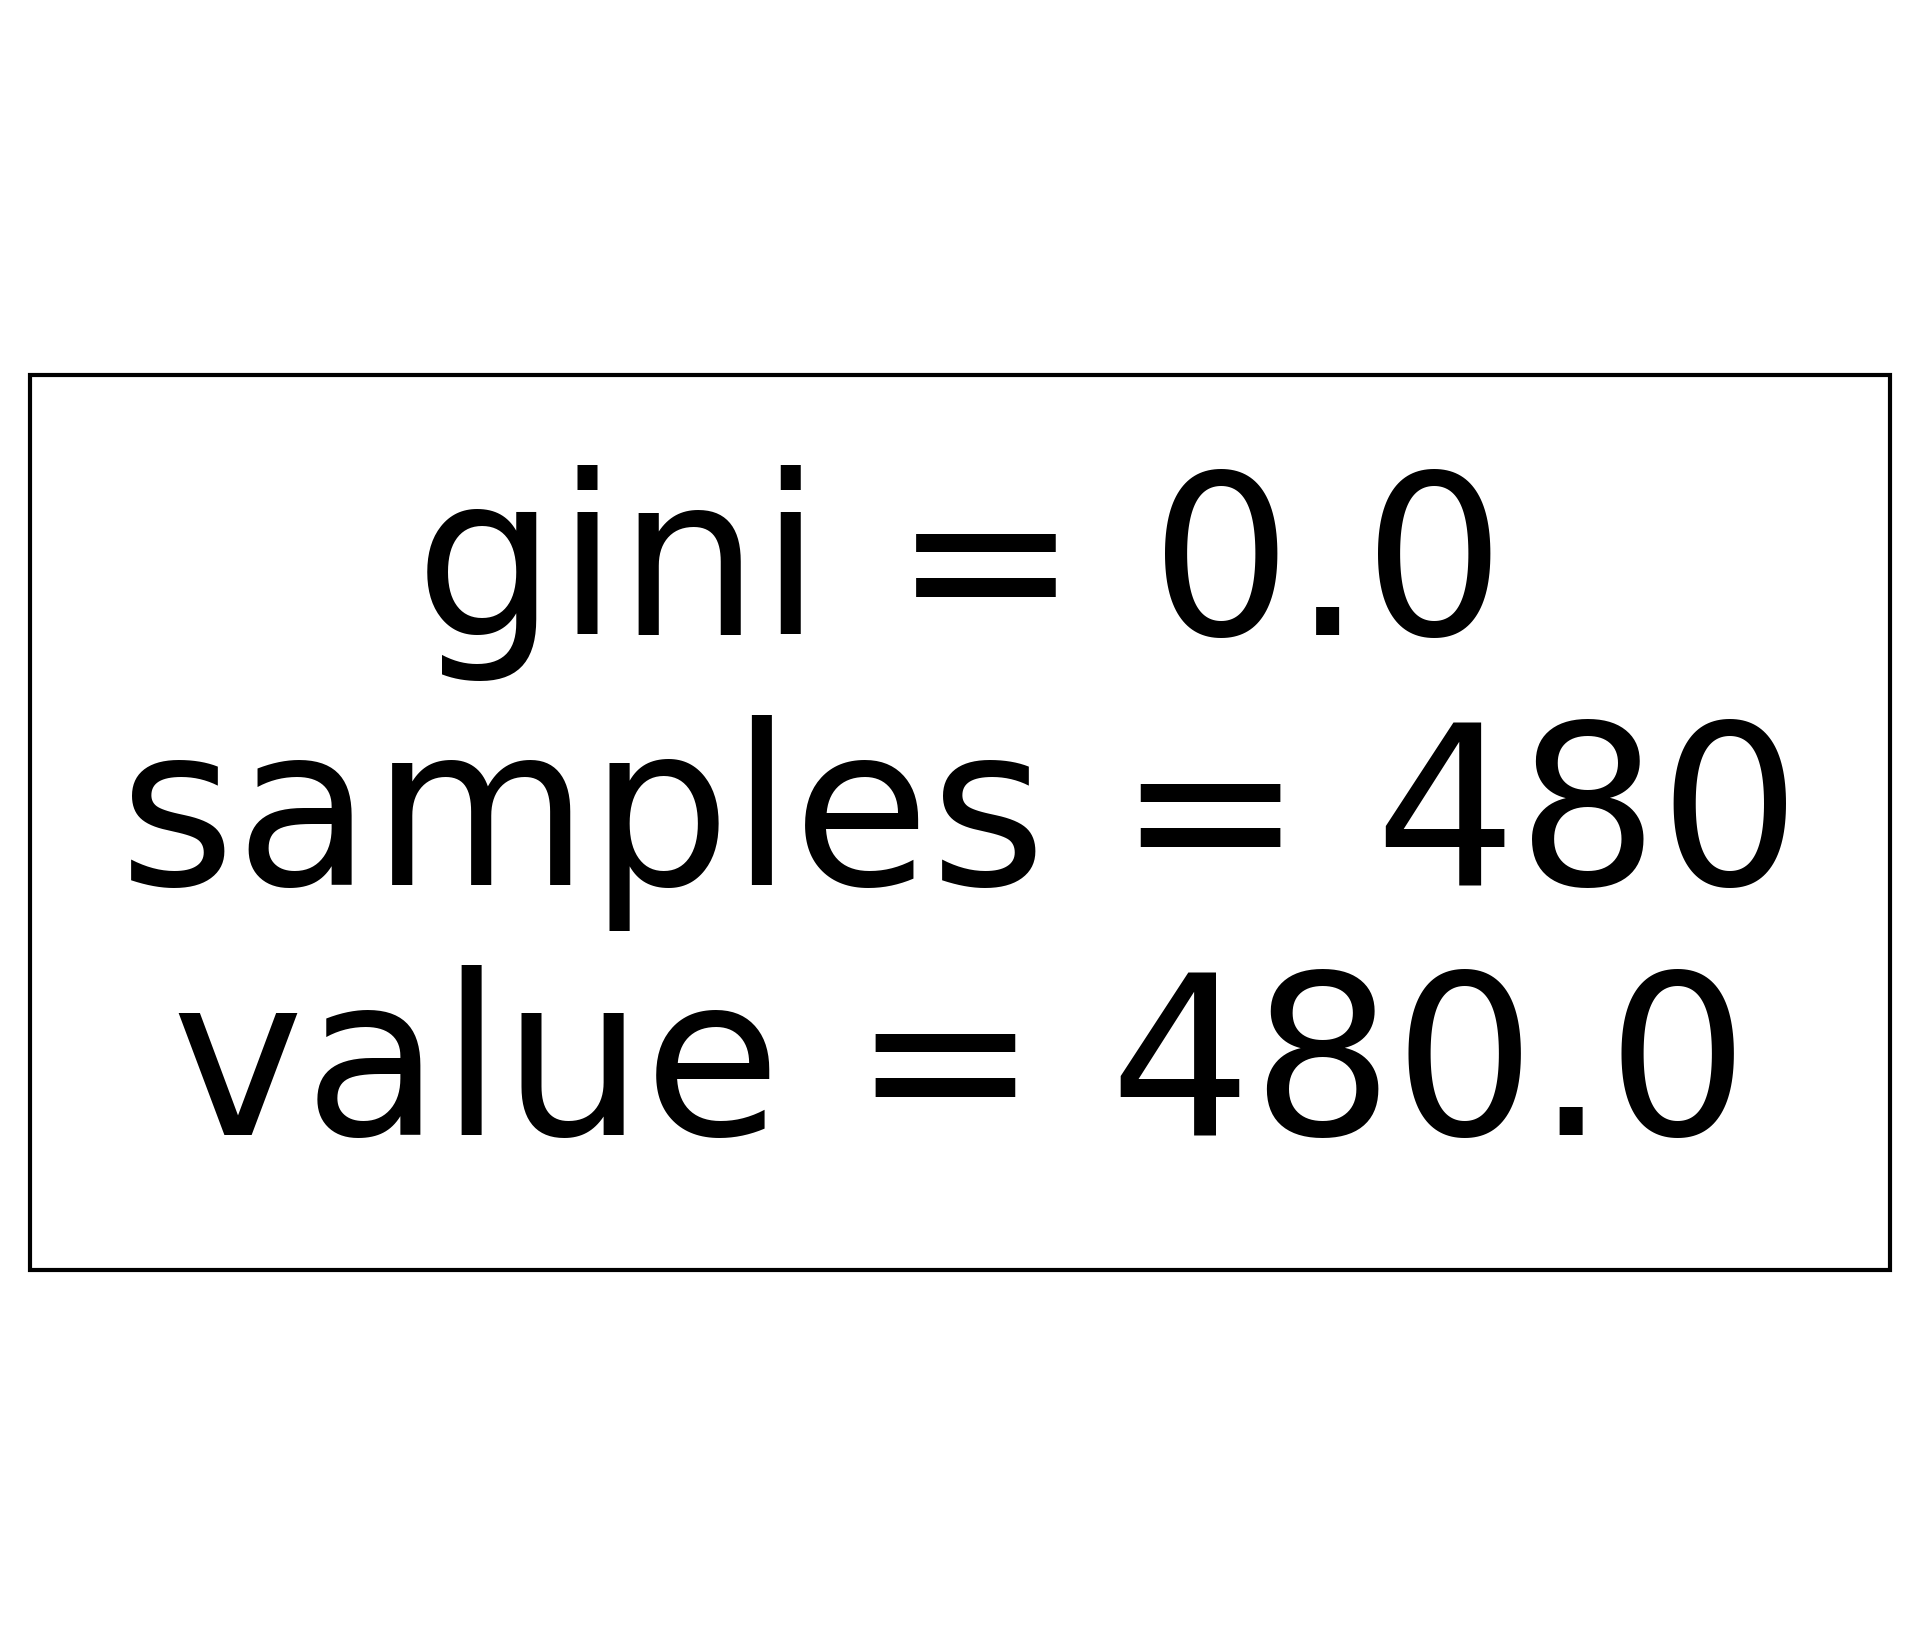

In [63]:
fn=[ 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
   'Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [64]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [65]:
pd.Series(y_test).value_counts()

0    120
Name: Taxable_Income, dtype: int64

In [66]:
pd.crosstab(y_test,preds)

col_0,0
Taxable_Income,
0,120


In [67]:
np.mean(preds==y_test)

1.0

In [68]:
array=Fraud_check.values
array

array([[ 0,  2, 10,  1,  0],
       [ 1,  0, 18,  1,  0],
       [ 0,  1, 30,  1,  0],
       ...,
       [ 0,  0,  0,  1,  0],
       [ 1,  1, 17,  0,  0],
       [ 0,  0, 16,  0,  0]])

In [69]:
X=array[:,0:4]
X

array([[ 0,  2, 10,  1],
       [ 1,  0, 18,  1],
       [ 0,  1, 30,  1],
       ...,
       [ 0,  0,  0,  1],
       [ 1,  1, 17,  0],
       [ 0,  0, 16,  0]])

In [70]:
Y=array[:,4]
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [72]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()

In [73]:
model1.fit(X_train, Y_train)

DecisionTreeRegressor()

In [74]:
model1.score(X_test, Y_test)

1.0

In [75]:
#The Regressor method is not best fit for Decision Tree

In [76]:
Comp_Data= pd.read_csv("Company_Data.csv")
Comp_Data.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'Company_Data.csv'

In [77]:
Comp_Data.shape

NameError: name 'Comp_Data' is not defined

In [78]:
Comp_Data.info()

NameError: name 'Comp_Data' is not defined

In [79]:
Comp_Data.dtypes

NameError: name 'Comp_Data' is not defined

In [80]:
Comp_Data.describe()

NameError: name 'Comp_Data' is not defined

In [81]:
Comp_Data.corr()

NameError: name 'Comp_Data' is not defined

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Comp_Data)

NameError: name 'Comp_Data' is not defined

In [83]:
sns.barplot(Comp_Data['Sales'], Comp_Data['Income'])

NameError: name 'Comp_Data' is not defined

In [84]:
sns.boxplot(Comp_Data['Sales'], Comp_Data['Income'])

NameError: name 'Comp_Data' is not defined

In [85]:
sns.lmplot(x='Income', y='Sales', data=Comp_Data)

NameError: name 'Comp_Data' is not defined

In [86]:
sns.jointplot(Comp_Data['Sales'], Comp_Data['Income'])

NameError: name 'Comp_Data' is not defined

In [87]:
sns.swarmplot(Comp_Data['Sales'], Comp_Data['Income'])

NameError: name 'Comp_Data' is not defined

In [88]:
sns.distplot(Comp_Data['Sales'])

NameError: name 'Comp_Data' is not defined

In [89]:
sns.distplot(Comp_Data['Income'])

NameError: name 'Comp_Data' is not defined

In [90]:
Comp_Data.loc[Comp_Data["Sales"] <= 10.00,"Sales1"]="Not High"
Comp_Data.loc[Comp_Data["Sales"] >= 10.01,"Sales1"]="High"

NameError: name 'Comp_Data' is not defined

In [91]:
Comp_Data

NameError: name 'Comp_Data' is not defined

In [92]:
label_encoder = preprocessing.LabelEncoder()
Comp_Data["ShelveLoc"] = label_encoder.fit_transform(Comp_Data["ShelveLoc"])
Comp_Data["Urban"] = label_encoder.fit_transform(Comp_Data["Urban"])
Comp_Data["US"] = label_encoder.fit_transform(Comp_Data["US"])
Comp_Data["Sales1"] = label_encoder.fit_transform(Comp_Data["Sales1"])

NameError: name 'Comp_Data' is not defined

In [93]:
Comp_Data

NameError: name 'Comp_Data' is not defined

In [94]:
x=Comp_Data.iloc[:,1:11]
x

NameError: name 'Comp_Data' is not defined

In [95]:
y=Comp_Data["Sales1"]
y

NameError: name 'Comp_Data' is not defined

In [96]:
Comp_Data.Sales1.value_counts()

NameError: name 'Comp_Data' is not defined

In [97]:
colnames=list(Comp_Data.columns)
colnames

NameError: name 'Comp_Data' is not defined

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [99]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [100]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

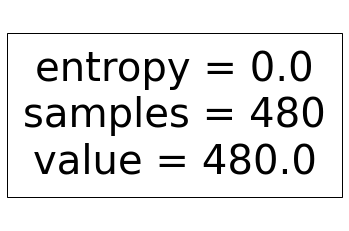

In [101]:
tree.plot_tree(model);

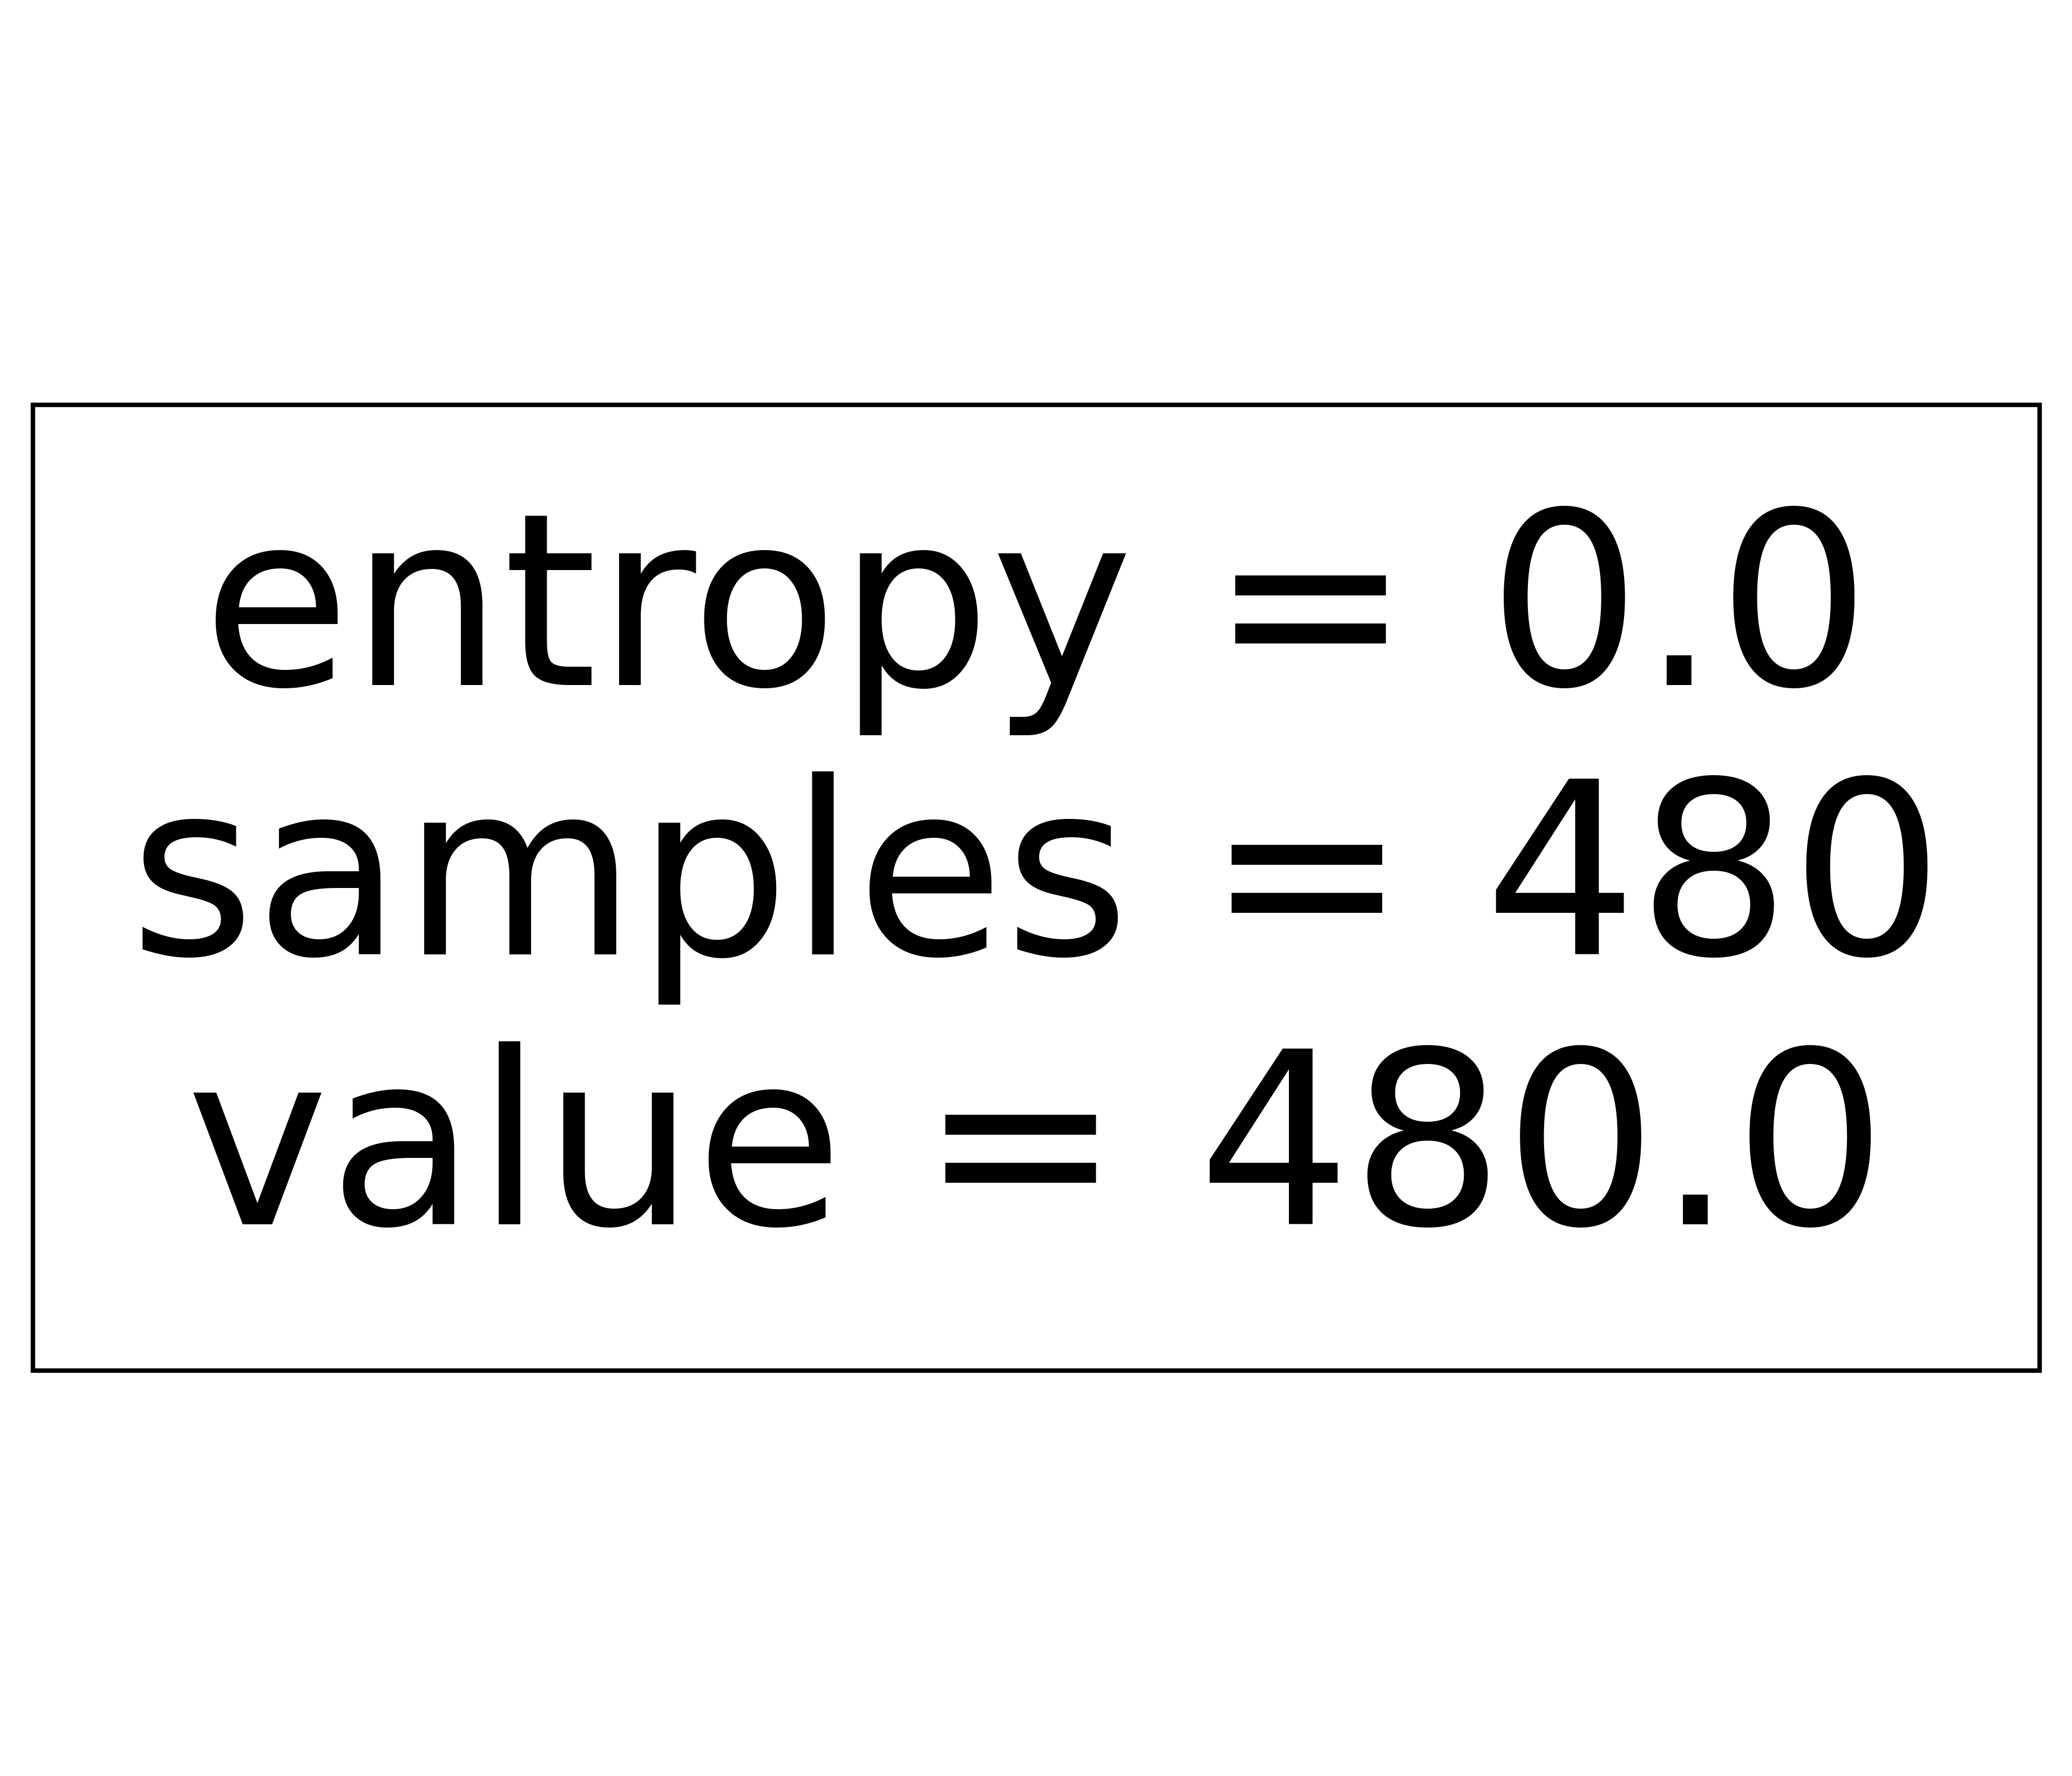

In [102]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Not High Sales', 'High Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=600)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [103]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [104]:
pd.Series(y_test).value_counts()

0    120
Name: Taxable_Income, dtype: int64

In [105]:
pd.crosstab(y_test,preds)

col_0,0
Taxable_Income,
0,120


In [106]:
np.mean(preds==y_test)

1.0

In [107]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [108]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [109]:
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [110]:
array=Comp_Data.values

NameError: name 'Comp_Data' is not defined

In [111]:
X=array[:,1:11]
X

array([[ 2, 10,  1,  0],
       [ 0, 18,  1,  0],
       [ 1, 30,  1,  0],
       ...,
       [ 0,  0,  1,  0],
       [ 1, 17,  0,  0],
       [ 0, 16,  0,  0]])

In [112]:
y=array[:,-1]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [114]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()

In [115]:
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [116]:
model1.score(X_test,y_test)

1.0

In [117]:
#This Dataset is not Good for Decision Tree Regrssion